<a href="https://colab.research.google.com/github/pushparani7/EDA_project/blob/main/Project_DA(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

pushparanib_store_sales_project_path = kagglehub.dataset_download('pushparanib/store-sales-project')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar
import scipy.stats as stats
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
pd.set_option("display.max_columns",None)
pd.set_option("display.float_format",lambda x:'%.2f'%x)

In [ ]:
#Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os

base_path = "/kaggle/input/store-sales-project"
print(os.listdir(base_path))


['oil.csv', 'holidays_events.csv', 'stores.csv', 'train.csv']


In [ ]:

base_path = "/kaggle/input/store-sales-project/"

train_df = pd.read_csv(base_path + "train.csv")
stores_df = pd.read_csv(base_path + "stores.csv")
holidays_events_df = pd.read_csv(base_path + "holidays_events.csv")
oil_df = pd.read_csv(base_path + "oil.csv")

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

print("Train Data")
print(train_df.head(), "\n")

print("Stores Data")
print(stores_df.head(), "\n")

print("Holidays & Events Data")
print(holidays_events_df.head(), "\n")

print("Oil Data")
print(oil_df.head())



Train Data
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE   0.00            0
1   1  2013-01-01          1   BABY CARE   0.00            0
2   2  2013-01-01          1      BEAUTY   0.00            0
3   3  2013-01-01          1   BEVERAGES   0.00            0
4   4  2013-01-01          1       BOOKS   0.00            0 

Stores Data
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4 

Holidays & Events Data
         date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fund

In [ ]:
# 📌 Basic EDA Phase 1

# 1. Check the shape of each dataset
print("📏 Dataset Shapes:")
print(f"Train: {train_df.shape}")
print(f"Stores: {stores_df.shape}")
print(f"Holidays & Events: {holidays_events_df.shape}")
print(f"Oil Prices: {oil_df.shape}")

print("-" * 50)

# 2. Preview first 5 rows of each
print("📌 Train Data:")
display(train_df.head())
print("\n📌 Stores Data:")
display(stores_df.head())
print("\n📌 Holidays & Events Data:")
display(holidays_events_df.head())
print("\n📌 Oil Prices Data:")
display(oil_df.head())

# 3. Check missing values
print("\n🔍 Missing Values:")
print("\nTrain:\n", train_df.isnull().sum())
print("\nStores:\n", stores_df.isnull().sum())
print("\nHolidays & Events:\n", holidays_events_df.isnull().sum())
print("\nOil Prices:\n", oil_df.isnull().sum())

# 4. Quick statistical summary (numeric columns only)
print("\n📊 Summary Statistics:")
print("Train:\n", train_df.describe())
print("\nOil Prices:\n", oil_df.describe())


📏 Dataset Shapes:
Train: (3000888, 6)
Stores: (54, 5)
Holidays & Events: (350, 6)
Oil Prices: (1218, 2)
--------------------------------------------------
📌 Train Data:


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0
1,1,2013-01-01,1,BABY CARE,0.00,0
2,2,2013-01-01,1,BEAUTY,0.00,0
3,3,2013-01-01,1,BEVERAGES,0.00,0
4,4,2013-01-01,1,BOOKS,0.00,0



📌 Stores Data:


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4



📌 Holidays & Events Data:


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False



📌 Oil Prices Data:


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20



🔍 Missing Values:

Train:
 id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Stores:
 store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

Holidays & Events:
 date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

Oil Prices:
 date           0
dcoilwtico    43
dtype: int64

📊 Summary Statistics:
Train:
               id  store_nbr      sales  onpromotion
count 3000888.00 3000888.00 3000888.00   3000888.00
mean  1500443.50      27.50     357.78         2.60
std    866281.89      15.59    1102.00        12.22
min         0.00       1.00       0.00         0.00
25%    750221.75      14.00       0.00         0.00
50%   1500443.50      27.50      11.00         0.00
75%   2250665.25      41.00     195.85         0.00
max   3000887.00      54.00  124717.00       741.00

Oil Prices:
        dcoilwtico
count     1175.00
mean        6

In [ ]:
#forward fill + interpolation
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].interpolate().fillna(method='bfill')
print(f"oil:{oil_df.isnull().sum()}")

oil:date          0
dcoilwtico    0
dtype: int64


📊 Correlation Heatmap — Train Data


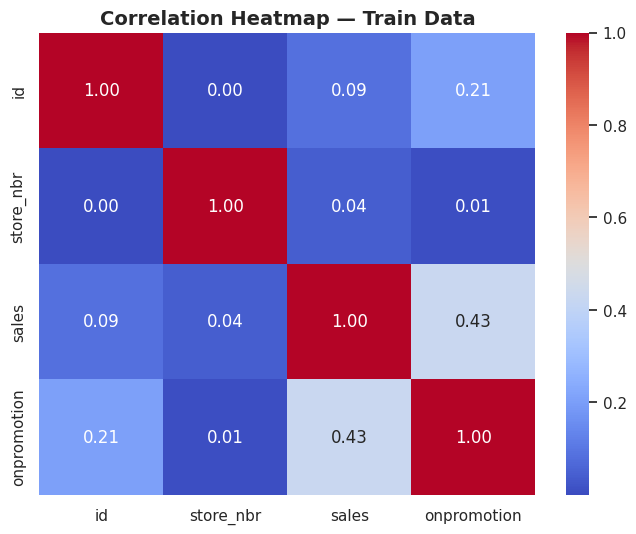


🛢 Oil Price Trend Over Time


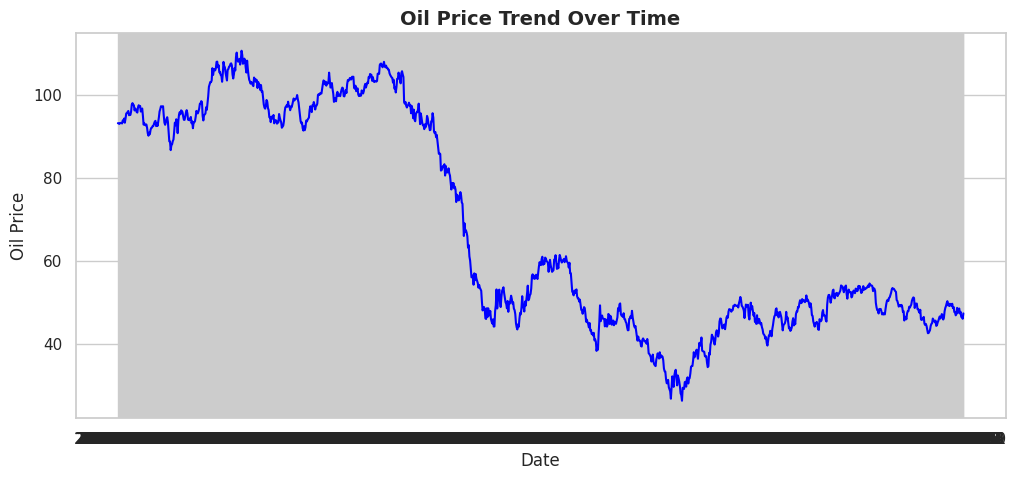


🏪 Store Type Distribution


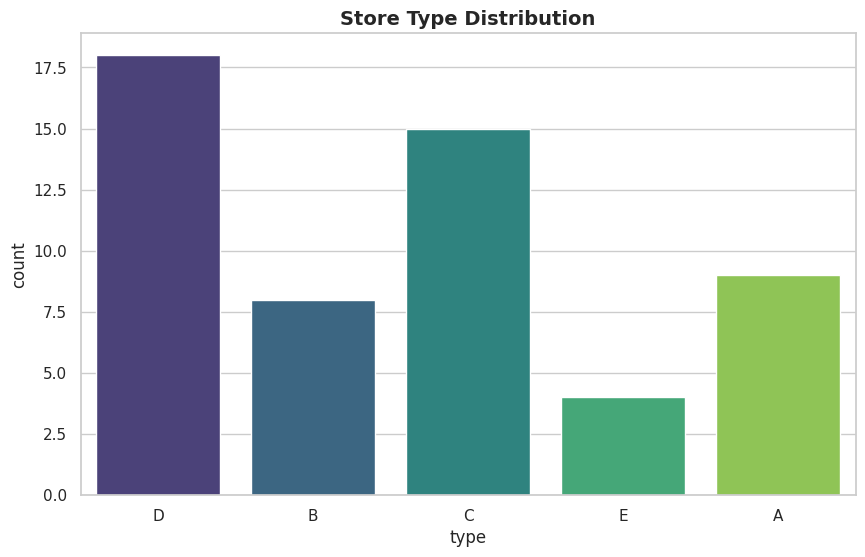


🎉 Holiday Events by Type


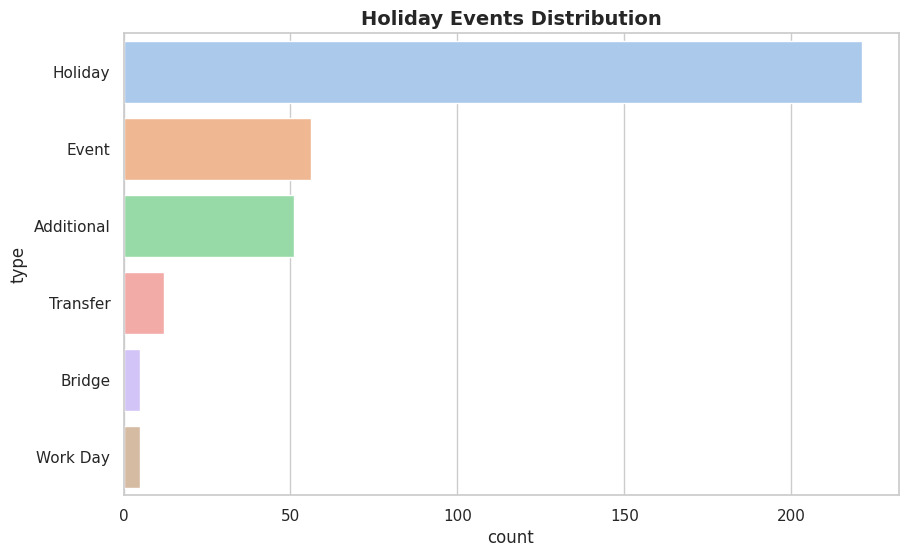

In [ ]:
# 📌 Phase 2 EDA — Correlation & Visualization Setup
# Set plot style
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Correlation heatmap for Train data (numeric columns only)
print("📊 Correlation Heatmap — Train Data")
numeric_cols = train_df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap — Train Data", fontsize=14, fontweight="bold")
plt.show()

# 2. Oil Price trend over time
print("\n🛢 Oil Price Trend Over Time")
plt.figure(figsize=(12, 5))
plt.plot(oil_df['date'], oil_df['dcoilwtico'], color='blue')
plt.xlabel("Date")
plt.ylabel("Oil Price")
plt.title("Oil Price Trend Over Time", fontsize=14, fontweight="bold")
plt.grid(True)
plt.show()

# 3. Store type count plot
print("\n🏪 Store Type Distribution")
sns.countplot(x="type", data=stores_df, palette="viridis")
plt.title("Store Type Distribution", fontsize=14, fontweight="bold")
plt.show()

# 4. Holiday Events by Type
print("\n🎉 Holiday Events by Type")
sns.countplot(y="type", data=holidays_events_df, order=holidays_events_df["type"].value_counts().index, palette="pastel")
plt.title("Holiday Events Distribution", fontsize=14, fontweight="bold")
plt.show()
